# Introduction to Scikit-Learn

In [1]:
what_will_be_covered = (
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator",
    "3. Fit the model/algorithm and use it to make prediction on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together")

## 0. An end-to-end Scikit_Learn workflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
# 1. Get the data ready
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [8]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

In [30]:
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
clf.fit(X_train, y_train);

In [33]:
# make a prediction
y_pred =  clf.predict(X_test)

In [34]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [40]:
# evaluate the model
clf.score(X_train, y_train)

1.0

In [41]:
clf.score(X_test, y_test)

0.8360655737704918

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [43]:
confusion_matrix(y_test, y_pred)

array([[23,  5],
       [ 5, 28]], dtype=int64)

In [44]:
accuracy_score(y_test, y_pred)

0.8360655737704918

In [55]:
# 5. Improve a model
# Try different amount of n_estimators
for i in range(10, 210, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:2f}")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 83.606557

Trying model with 20 estimators...
Model accuracy on test set: 81.967213

Trying model with 30 estimators...
Model accuracy on test set: 86.885246

Trying model with 40 estimators...
Model accuracy on test set: 86.885246

Trying model with 50 estimators...
Model accuracy on test set: 88.524590

Trying model with 60 estimators...
Model accuracy on test set: 81.967213

Trying model with 70 estimators...
Model accuracy on test set: 85.245902

Trying model with 80 estimators...
Model accuracy on test set: 85.245902

Trying model with 90 estimators...
Model accuracy on test set: 85.245902

Trying model with 100 estimators...
Model accuracy on test set: 85.245902

Trying model with 110 estimators...
Model accuracy on test set: 81.967213

Trying model with 120 estimators...
Model accuracy on test set: 86.885246

Trying model with 130 estimators...
Model accuracy on test set: 86.885246

Trying model with 140 estimators..

In [56]:
# 6.Save a model and load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [57]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8688524590163934

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels (usually 'X' & 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [65]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [74]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, x_test = train_test_split(X, y, test_size=0.2)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it's all numerical

In [4]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [3]:
len(car_sales)

1000

In [4]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [5]:
# split the data into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [16]:
# Split into training and test data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [7]:
# Build ML model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Nissan'

In [13]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot=OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [15]:
pd.get_dummies(car_sales[["Make", "Colour", "Doors"]]).head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [17]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train);
model.score(X_test, y_test)

0.3235867221569877

## 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether.

In [2]:
# import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [5]:
# Let's try convert our data to numbers
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catergorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, catergorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

# It worked because newer versions of OneHotEncoder can handle missing value
# Data cleanup is still needed

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [6]:
pd.DataFrame(transformed_X).dtypes

0    object
dtype: object

In [16]:
# output above is not correct

### Option 1: Fill missing data with Pandas

In [7]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("Missing", inplace=True)

# Fill the "Color"
car_sales_missing["Colour"].fillna("Missing", inplace=True)

In [8]:
# Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [9]:
# Remove rows with missing Price value 
car_sales_missing.dropna(inplace=True)

In [10]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [11]:
X = car_sales_missing.drop("Price", axis =1)
y = car_sales_missing["Price"]

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catergorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, catergorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

### Option 2: Fill missing data with Scikit-Learn

In [2]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [4]:
# Drop column with missing target values
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [5]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [6]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [7]:
X_train

,Make,Colour,Odometer (KM),Doors
637,Toyota,Red,88571.0,4.0
297,Toyota,Red,162665.0,4.0
231,Honda,Red,120306.0,4.0
542,Toyota,Blue,39311.0,4.0
539,Honda,White,120283.0,4.0
...,...,...,...,...
331,Toyota,White,112292.0,4.0
96,Toyota,Blue,29856.0,4.0
202,Honda,Blue,84719.0,4.0
980,Toyota,Blue,230314.0,4.0


In [8]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"] 

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_features", num_imputer, num_features)
])

In [9]:
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

In [10]:
filled_X_train

array([['Toyota', 'Red', 4.0, 88571.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'Red', 4.0, 120306.0],
       ...,
       ['Honda', 'Blue', 4.0, 84719.0],
       ['Toyota', 'Blue', 4.0, 230314.0],
       ['BMW', 'White', 3.0, 148949.0]], dtype=object)

In [11]:
filled_X_train = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
filled_X_train

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Red,4.0,88571.0
1,Toyota,Red,4.0,162665.0
2,Honda,Red,4.0,120306.0
3,Toyota,Blue,4.0,39311.0
4,Honda,White,4.0,120283.0
...,...,...,...,...
755,Toyota,White,4.0,112292.0
756,Toyota,Blue,4.0,29856.0
757,Honda,Blue,4.0,84719.0
758,Toyota,Blue,4.0,230314.0


In [12]:
filled_X_test = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
filled_X_test

,Make,Colour,Doors,Odometer (KM)
0,BMW,Blue,5.0,72575.0
1,Nissan,Blue,4.0,10954.0
2,Nissan,White,4.0,51004.0
3,missing,Blue,4.0,216250.0
4,Toyota,White,4.0,189194.0
...,...,...,...,...
185,Toyota,Blue,4.0,180156.0
186,Honda,Blue,4.0,171303.0
187,Toyota,White,4.0,81656.0
188,BMW,missing,5.0,206446.0


In [13]:
filled_X_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [14]:
filled_X_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [15]:
# Convert categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X_train = transformer.fit_transform(filled_X_train)

In [16]:
transformed_X_test = transformer.transform(filled_X_test)

In [21]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test,y_test)

0.2750066361411052

## Choosing the right estimator for this problem

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

### 2.1 Picking a machine learning model for a regression problem

In [22]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [23]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = boston["target"]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [33]:
# hom many samples?
len(boston_df)

506

In [37]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create data

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split data into train/test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [43]:
# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Chec the score of the Rigde model in test data
model.score(X_test, y_test)

0.6662221670168522

How do we improve this score?

What it Ridge wasn't working?

In [45]:
# Let's try the Random Forest Reggressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Chec the score of the RandomForestRegressor model in test data
model.score(X_test, y_test)

0.8922527442109116

In [3]:
### 2.2 Choosing the right estimator for classification progress
heart_diesease = pd.read_csv("data/heart-disease.csv")
heart_diesease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
len(heart_diesease)

303

Consulting the map and it says to try 'LinearSVC'

In [71]:
# Import the Linear SVC estimator class
from sklearn.svm import LinearSVC


# Setup random seed
np.random.seed(42)

# Make the data
X = heart_diesease.drop("target", axis=1)
y = heart_diesease["target"]

# Split into train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

# create an instance of LinearSVC
model = LinearSVC(max_iter=10000000)
model.fit(X_train, y_train)

# evaluate model on test data
model.score(X_test, y_test)

0.8688524590163934

In [82]:
# import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from time import time

# Setup random seed
np.random.seed(42)
# Create test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# create instance of RandomForestClassifier

model_RFC = RandomForestClassifier(n_estimators=1000)
model_RFC.fit(X_train, y_train)

# evaluate model on test data
model_RFC.score(X_test, y_test)

0.8524590163934426

In [84]:
what_will_be_covered

('0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together')

## 3. Fit the model on our data and use it to make predictions on our data

### 3.1 Fitting the model to the data.

Different names for:
* X = features, features variables, data
* y = labels, targets, target variables

In [88]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Create instance of RandomForestClassifier
model_RFC = RandomForestClassifier()

# Fit the model to the data (training the machine learining model)
model_RFC.fit(X_train, y_train)

# Evaluate model on test data (use the patterns that model has found)
model_RFC.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learining model

2 ways to make predictions:
1. 'predict()'
2. 'predict_proba()'

In [92]:
# Use a trained model to make an predictions

In [93]:
model_RFC.predict(np.array([1,7,8,3,4])) # this dosen't work...

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [95]:
X_test.shape

(61, 13)

In [98]:
y_preds = model_RFC.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [97]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [99]:
# compare predictions to truth labels to evalueate the model
np.mean(y_preds == y_test)

0.8524590163934426

In [100]:
model_RFC.score(X_test, y_test)

0.8524590163934426

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with predict_proba()

In [102]:
# predict_proba() returns probabilities of a classification label
model_RFC.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

'predict()' can also be used for reggresion models

In [108]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Create test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [109]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [110]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [111]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

In [112]:
what_will_be_covered

('0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together')

## 4. Evaluating a model

Three ways to evaluate Scikit-Learn models
1. Estimator `score` method
2. The `scoring`parameter
3. Problem-specific metric functions

### 4.1 Evaluating model using `score` method

In [115]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diesease.drop("target", axis=1)
y = heart_diesease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train)

In [116]:
model.score(X_train, y_train)

1.0

In [117]:
model.score(X_test, y_test)

0.8524590163934426

### 4.2 Evaluating a model using the `scoring` parameter

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diesease.drop("target", axis=1)
y = heart_diesease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train);

In [119]:
model.score(X_test, y_test)

0.8524590163934426

<img src="sklearn-cross-validation.png"/>

In [125]:
# Performs N splits, fits and tests on ENTIRE data set. On default use default scoring of classifier
cross_val_score(model, X, y)

array([0.83606557, 0.91803279, 0.78688525, 0.78333333, 0.78333333])

In [126]:
# Mean of the 5-fold cross-validation score
cvs_mean = np.mean(cross_val_score(model, X, y))

In [127]:
cvs_mean

0.8183060109289617

In [128]:
# Scoring parameters set to None by default:
cross_val_score(model, X, y, scoring=None)

array([0.80327869, 0.86885246, 0.86885246, 0.86666667, 0.78333333])

#### 4.2.1 Classification model ecaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diesease.drop("target", axis=1)
y = heart_diesease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train);
cv_score = cross_val_score(model, X, y)
cv_score

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [133]:
cvs_mean = np.mean(cv_score)
cvs_mean

0.811639344262295

In [135]:
print(f"Heart Diesease Classifier Cross-Validated Accuracy: {cvs_mean*100:.2f}%")

Heart Diesease Classifier Accuracy: 81.16%


**Area under the Reciver Operating Characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (TPR) versus a models false positive rate (FPR)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [6]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_diesease.drop("target", axis=1)
y = heart_diesease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train);


# Make predictions with propabilities
y_proba = model.predict_proba(X_test)
y_proba[:10], len(y_proba)

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.99, 0.01],
        [0.47, 0.53]]),
 61)

In [8]:
y_probs_posivite = y_proba[:, 1]
y_probs_posivite[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [15]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_posivite)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

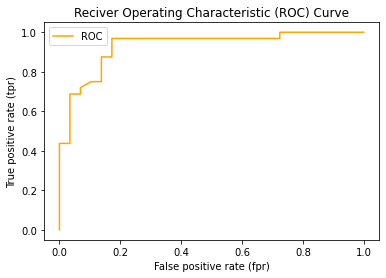

In [16]:
# Create a function for ploting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    PLots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power
#     plt.plot([0, 1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [17]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_posivite)

0.9304956896551724

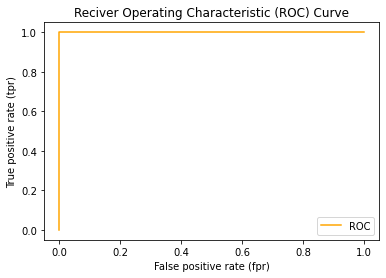

In [18]:
# Plot perfect ROC curve and AUC score
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [19]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, giving you an idea of where the model is getting confused

In [20]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [22]:
# Visualize confusion matrix with.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Labels"])


Predicted Labels,0,1
Actual Label,,
0,24,5
1,4,28


In [ ]:
# How to install conda package from Jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\MLandDS\Introdiction_to_DS_tools\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.11.1             |     pyhd3eb1b0_0         212 KB
    ------------------------------------------------------------
                                           Total:         212 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.1-pyhd3eb1b0_0




seaborn-0.11.1       | 212 KB    |            |   0% 
seaborn-0.11.1       | 212 KB    | 7          |   8% 
seaborn-0.11.1       | 212 KB    | ######7    |  68% 
seaborn-0.11.1       | 212 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


<AxesSubplot:>

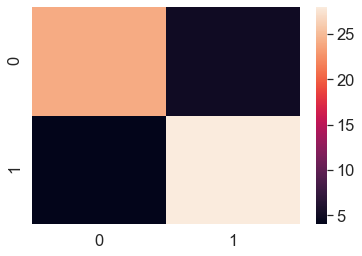

In [24]:
# Make confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns
# Set the font scale 
sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

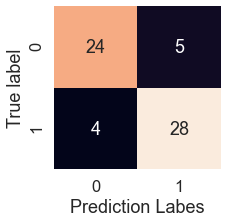

In [31]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot=True, # Annotate the boxes with conf_mat info
                    cbar=False)
    
    plt.xlabel("Prediction Labes")
    plt.ylabel("True label")

plot_conf_mat(conf_mat)

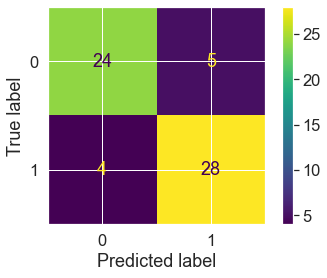

In [35]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)

Classification report

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Each term measures something slightly different:

* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

When should you use each?

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

To summarize:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.

### 4.2.2 Reggresion model evaluation metrics

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

** Coefficient of determination**

What Coefficient of determination does: Compares your models predictions to the mean of the targets. Values can range from negative infinity(a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = boston["target"]

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train,y_train)

In [47]:
model.score(X_test, y_test)

0.8654448653350507

In [48]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [57]:
r2_score(y_test, y_test)

1.0

In [60]:
r2_score(y_test_mean, y_test)

0.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models prediction are.

In [61]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [64]:
r2_score(y_test, y_preds)

0.8654448653350507

In [72]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values":y_preds} )
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Squared Error (MSE)**

In [70]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)

In [71]:
mse

9.867437068627442

In [75]:
# Calculate MSE by hand
squared = np.square(df["differences"]).mean()
squared

9.867437068627439

 ### 4.2.3 Fnally using the `scoring` parameter

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_diesease.drop("target", axis=1)
y = heart_diesease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train)
model.score(X_test, y_test)

0.8524590163934426

In [12]:
np.random.seed(42)
cv_acc = cross_val_score(model, X, y, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [13]:
# Cross-validated accuracy 
print(f"The cross-validated accuracy is: {np.mean(cv_acc) *100:.2f}%")

The cross-validated accuracy is: 82.48%


In [15]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(model, X, y, cv=5, scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [17]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(model, X, y, scoring="recall")
np.mean(cv_recall)

0.8545454545454545

In [18]:
np.random.seed(42)
cv_f1 = cross_val_score(model, X, y, scoring="f1")
np.mean(cv_f1)

0.8426854603423346

How about our reggresion model?

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)
model.score(X_test, y_test)

0.8654448653350507

In [29]:
np.random.seed(42)
cv_r2= cross_val_score(model, X, y, scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [30]:
np.random.seed(42)
cv_r2= cross_val_score(model, X, y, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [31]:
np.random.seed(42)
cv_mae= cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [32]:
# Mean squared error
np.random.seed(42)
cv_mse= cross_val_score(model, X, y, scoring="neg_mean_squared_error")
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

### 4.3 Using different evaluation metrics as Scikit-Learn functions

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_diesease.drop("target", axis=1)
y = heart_diesease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train)
model.score(X_test, y_test)

0.8524590163934426

In [35]:
y_preds = model.predict(X_test)

In [40]:
# Evalueate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1 score: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1 score: 0.8615384615384615


**Regression evaluation functions**

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor().fit(X_train, y_train)
model.score(X_test, y_test)

0.8494501439301596

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)
model.score(X_test, y_test)

0.8654448653350507

In [45]:
# Make predictions using our model
y_preds = model.predict(X_test)
# Evalate reggression model
print("Reggresion model metrics on the test set")
print(f"Coefficient of determination: {r2_score(y_test, y_preds)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_preds)}")

Reggresion model metrics on the test set
Coefficient of determination: 0.8654448653350507
Mean Absolute Error: 2.136382352941176
Mean Squared Error: 9.867437068627442


## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect moew data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model that we can use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = parasettings on a model you can adjust to (potentially) improve its ability to find patters.

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets: training, validation and test.

In [48]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds_classification(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    
    return metric_dict

In [42]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_diesease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_diesease_shuffled.drop("target", axis=1)
y = heart_diesease_shuffled["target"]


In [43]:
# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_diesease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_diesease_shuffled)) # 85%
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make base line predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds_classification(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1 Score: 0.8399999999999999


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [45]:
np.random.seed(42)
# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds = clf_2.predict(X_valid)

# Evaluate the classifier on validation set
clf_2_metrics = evaluate_preds_classification(y_valid, y_preds)
clf_2_metrics

Accuracy: 82.22%
Precision: 0.8148148148148148
Recall: 0.88
F1 Score: 0.8461538461538461


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [46]:
np.random.seed(42)
# Create a second classifier with different hyperparameters
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf_3.fit(X_train, y_train)

# Make predictions
y_preds = clf_3.predict(X_valid)

# Evaluate the classifier on validation set
clf_3_metrics = evaluate_preds_classification(y_valid, y_preds)
clf_3_metrics

Accuracy: 84.44%
Precision: 0.8214285714285714
Recall: 0.92
F1 Score: 0.8679245283018867


{'accuracy': 0.84, 'precision': 0.82, 'recall': 0.92, 'f1': 0.87}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
grid = {"n_estimators": [100,200,500],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features":["auto", "sqrt"], 
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 4, 6]
       }

np.random.seed(42)


# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=12)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=50, cv=5, verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=auto, mi

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_fea

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=12), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 500]},
                   verbose=2)

In [54]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [74]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_valid)
rs_metrics = evaluate_preds_classification(y_valid, rs_y_preds)

Accuracy: 77.78%
Precision: 0.7777777777777778
Recall: 0.84
F1 Score: 0.8076923076923077


### 5.3 Hyperparameter tuning with GridSearchCV

In [60]:
grid_2 = {"n_estimators": [100,200,500],
        "max_depth": [3,5],
        "max_features":["auto", "sqrt"], 
        "min_samples_leaf": [1,2, 4],
        "min_samples_split":[2,4,8]
       }

In [56]:
3*2*2*3*3

108

In [61]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)


# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=12)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf, param_grid=grid_2, cv=5, verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tota

[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_sam

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_sam

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=12),
             param_grid={'max_depth': [3, 5], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [79]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_valid)
gs_metrics = evaluate_preds_classification(y_valid, gs_y_preds)

Accuracy: 84.44%
Precision: 0.8214285714285714
Recall: 0.92
F1 Score: 0.8679245283018867


Let's compare different models metrics.

In [80]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                              "clf_2": clf_2_metrics,
                              "clf_3": clf_3_metrics,
                              "RandomSearch": rs_metrics,
                              "GridSearch":gs_metrics})
compare_metrics

,baseline,clf_2,clf_3,RandomSearch,GridSearch
accuracy,0.82,0.82,0.84,0.78,0.84
precision,0.84,0.81,0.82,0.78,0.82
recall,0.84,0.88,0.92,0.84,0.92
f1,0.84,0.85,0.87,0.81,0.87


<AxesSubplot:>

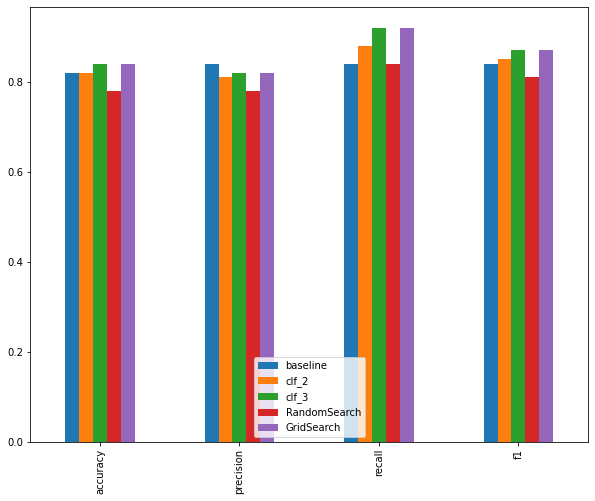

In [81]:
compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and loading machine learning models

Two ways to sabe and load machine learing models
1. With Python's `Pickle` module
2. With the `joblib` module

**Pickle**

In [65]:
import pickle
# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [67]:
# Load a saved_model 
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [73]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds_classification(y_test, pickle_y_preds)

Accuracy: 84.78%
Precision: 0.875
Recall: 0.84
F1 Score: 0.8571428571428572


{'accuracy': 0.85, 'precision': 0.88, 'recall': 0.84, 'f1': 0.86}

**Joblib**

In [82]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [83]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [84]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds_classification(y_test, pickle_y_preds)

Accuracy: 84.78%
Precision: 0.875
Recall: 0.84
F1 Score: 0.8571428571428572


{'accuracy': 0.85, 'precision': 0.88, 'recall': 0.84, 'f1': 0.86}